In [433]:
import pickle
import numeritos as nitos
import sqlite3
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [434]:
connection = sqlite3.connect("../data/twitter.db")
crsr = connection.cursor()

In [435]:
df_tweets = pd.read_sql('SELECT * FROM tweets', connection, parse_dates=['created_at'])
df_users = pd.read_sql('SELECT * FROM users', connection)

In [436]:
df_tweets['text'] = df_tweets['text'].apply(lambda x: nitos.clean_emoji(x))

In [437]:
def remove_links(text):
    return " ".join([' ' if ('http') in word else word for word in text.split()])

df_tweets['text'] = df_tweets['text'].apply(lambda x: remove_links(x))

In [438]:
def remove_stopwords(text, language):
    stop = stopwords.words(language)
    return ' '.join([word for word in text.split() if word not in (stop)])

df_tweets['text'] = df_tweets['text'].apply(lambda x: remove_stopwords(x, 'spanish'))

In [439]:
def remove_metions(text):
    return re.sub(r"\@\w+[,]|\@\w+|[,]\@\w+", " ", text)

df_tweets['text'] = df_tweets['text'].apply(lambda x: remove_metions(x))

In [440]:
def signs_tweets(text, signs):
    return signs.sub(' ', text.lower())

signs = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\¡)")

df_tweets['text'] = df_tweets['text'].apply(lambda x: signs_tweets(x, signs))

In [441]:
def remove_hash(text):
    return re.sub(r"\#\w+[,]|\#\w+|[,]\#\w+", "", text)

df_tweets['text'] = df_tweets['text'].apply(lambda x: remove_hash(x))

In [442]:
def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

df_tweets['text'] = df_tweets['text'].apply(lambda x: spanish_stemmer(x))

In [443]:
df_tweets['text'] = df_tweets['text'].apply(lambda x: nitos.clean_emoji(x))

In [444]:
path = '../model/sentiment_model'
model = pickle.load(open(path,'rb'))

In [445]:
model

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [446]:
model[1].n_features_in_

1000

In [447]:
feature_names = model[0].get_feature_names()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [448]:
feature_names

['_rubalcaba_',
 'abandon',
 'abc',
 'abc_es',
 'abces',
 'abiert',
 'abog',
 'abraz',
 'abre',
 'abril',
 'absolut',
 'acab',
 'accident',
 'acept',
 'acerc',
 'acert',
 'aclar',
 'acompañ',
 'acord',
 'activ',
 'acto',
 'actual',
 'acuerd',
 'acus',
 'adel',
 'ademas',
 'administr',
 'admir',
 'aeropuert',
 'afect',
 'agu',
 'aguirr',
 'ahi',
 'ahor',
 'ahor si',
 'air',
 'ajust',
 'albert_river',
 'alcald',
 'alegr',
 'alejandrosanz',
 'alemani',
 'alexdelaiglesi',
 'alfons',
 'algui',
 'algun',
 'alli',
 'alons',
 'amaiur',
 'amenaz',
 'amig',
 'amnist',
 'amor',
 'ampli',
 'ana',
 'analisis',
 'andaluc',
 'andaluci',
 'andaluz',
 'anim',
 'anoch',
 'anotici',
 'anterior',
 'anunci',
 'aplaud',
 'aplaus',
 'aplic',
 'apoy',
 'aprob',
 'apuest',
 'aqu',
 'aquell',
 'aqui',
 'aren',
 'argentin',
 'arranc',
 'arte',
 'articul',
 'asegur',
 'asi',
 'asturi',
 'asunt',
 'ataqu',
 'atencion',
 'athletic',
 'audienci',
 'aument',
 'aun',
 'aunqu',
 'auster',
 'autonom',
 'ave',
 'avis',
 

In [449]:
model_feat = model[1]

In [450]:
importance = model_feat.coef_[0]

In [451]:
feat_importances = pd.Series(importance, index = feature_names)

<AxesSubplot:title={'center':'Feature Importance'}>

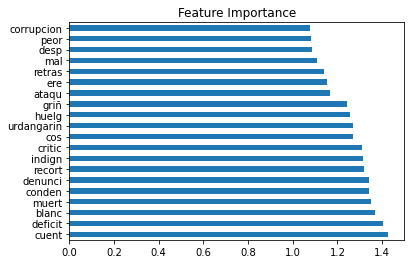

In [452]:
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [453]:
predict_df = df_tweets['text']

In [454]:
predictions = model.predict(predict_df)
predictions_prob = model.predict_proba(predict_df)

In [455]:
sentiment1 = [i[0] for i in predictions_prob]
sentiment2 = [i[1] for i in predictions_prob]

In [456]:
df_tweets['sentiment'] = predictions
df_tweets['sentiment1'] = sentiment1
df_tweets['sentiment2'] = sentiment2

In [457]:
df_tweets.head()

,id,text,author_id,created_at,retweet_count,reply_count,like_count,quote_count,sentiment,sentiment1,sentiment2
0,1578613094191796224,gent agrad ries dia dia el tem pas tiemp traba...,1578095844569514011,2022-10-08 05:07:45,0,0,0,0,0,0.982208,0.017792
1,1577334577701453827,recordar seman vien primer qued madr gran suer...,1003872445,2022-10-04 16:27:23,2,0,12,0,0,0.919747,0.080253
2,1576902991507922944,el desarroll web perfil demand merc laboral de...,2529499620,2022-10-03 11:52:25,3,0,3,0,0,0.705893,0.294107
3,1576856703349374976,enhorabuen crack,706520411551494145,2022-10-03 08:48:29,0,0,1,0,0,0.884458,0.115542
4,1575217357105946624,hoy fin ve luz prim cas study public un trabaj...,604485175,2022-09-28 20:14:18,3,0,4,0,0,0.529245,0.470755
